In [12]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [9]:
Boston = pd.read_csv("../datasets/Boston.csv", index_col=0)

y = Boston.medv
X = Boston.iloc[:,range(13)]

param_grid = [{"n_estimators": [10, 100, 200, 300, 400, 500],
               "max_features": [1, 2,6, 8, 10, 13]}]

In [10]:
reg = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
reg.fit(X, y)

/home/mak/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [1, 2, 6, 8, 1

In [11]:
reg.cv_results_

{'mean_fit_time': array([0.00949793, 0.08096809, 0.16088109, 0.24036126, 0.32203679,
        0.40253205, 0.01009498, 0.0892488 , 0.17836075, 0.27342072,
        0.35798659, 0.44356194, 0.01398888, 0.12164402, 0.24154949,
        0.37046666, 0.48371463, 0.59851322, 0.01543417, 0.13891211,
        0.28175921, 0.40821743, 0.54474397, 0.70219746, 0.01642318,
        0.15239215, 0.30103097, 0.45422029, 0.60512638, 0.75287137,
        0.01847787, 0.1736969 , 0.34523864, 0.52118549, 0.6979311 ,
        0.86680613]),
 'std_fit_time': array([0.00036936, 0.00024115, 0.00128054, 0.00225039, 0.00358887,
        0.0026497 , 0.00013952, 0.00072667, 0.00170029, 0.00531376,
        0.00925757, 0.00624694, 0.00036352, 0.00349406, 0.00382579,
        0.00774943, 0.00698906, 0.00982803, 0.00025452, 0.00293045,
        0.00404529, 0.00756325, 0.01292018, 0.01124033, 0.00025943,
        0.00322736, 0.004568  , 0.01203473, 0.0143725 , 0.00914989,
        0.00026639, 0.00300737, 0.00588136, 0.00706396, 0.014

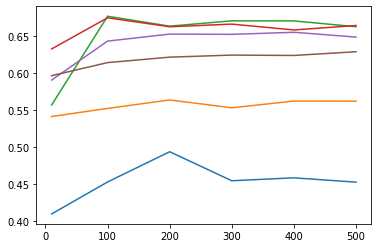

In [19]:
test_score = reg.cv_results_['mean_test_score']

x = param_grid[0]['n_estimators']
size = len(x)

for i in range(len(param_grid[0]['max_features'])):
    plt.plot(x, test_score[i*size: (i+1)*size])
